In [1]:
import math
from itertools import combinations

In [2]:
#定义距离公式
#p=1 曼哈顿
#p=2 欧氏距离
#p=n minkowski距离
def distance(x, y, p=2):
    if len(x) == len(y) and len(x) > 1:
        sum = 0
        for i in range(len(x)):
            sum += math.pow(abs(x[i] - y[i]), p)
        return math.pow(sum, 1/p)
    else:
        return 0

In [3]:
#例题3.1
x1 = [1,1]
x2 = [5,1]
x3 = [4,4]

In [4]:
for i in range(1, 5):
    dis = {distance(x1, c, p=i) for c in [x2, x3]}
    print(dis)

{4.0, 6.0}
{4.0, 4.242640687119285}
{3.7797631496846193, 3.9999999999999996}
{3.5676213450081633, 4.0}


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter

In [6]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

In [7]:
print(df.label.value_counts())
df.head()

2    50
1    50
0    50
Name: label, dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


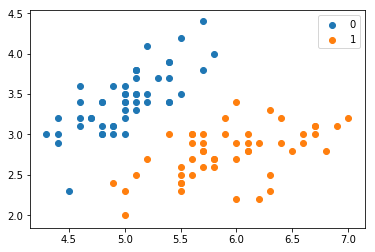

In [8]:
plt.scatter(df[:50]['sepal length (cm)'], df[:50]['sepal width (cm)'], label='0')
plt.scatter(df[50:100]['sepal length (cm)'], df[50:100]['sepal width (cm)'], label='1')
plt.legend()

In [9]:
#划分train、test set
import numpy as np
data = np.array(df.iloc[:100,[0,1,-1]])
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
class KNN:
    def __init__(self, X_train, y_train, k=3,  p=2):
        self.X_train = X_train
        self.y_train = y_train
        self.p = p
        self.k = k
    
    def predict(self, X):
        knn_list = []
        #将前k个填充进knn_list
        for i in range(self.k):
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p) #ord:范数
            knn_list.append((dist, self.y_train[i]))
        
        #遍历剩下的结果，将距离小的替换掉knn_list中最大的
        for i in range(self.k, len(self.X_train)):
            max_index = knn_list.index(max(knn_list, key=lambda x:x[0]))
            dist = np.linalg.norm(X-self.X_train, ord=self.p)
            if dist < knn_list[max_index][0]:
                knn_list[max_index] = (dist, self.y_train[i])
                
        #统计
        knn = [i[-1] for i in knn_list] #i[-1]为label
        count_pairs = Counter(knn)
        max_count = sorted(count_pairs, key=lambda x:x)[-1] #排序过后去出现次数最少的 ？
        return max_count
    def score(self, X_test, y_test):
        right_count = 0
        for X, y in zip(X_test, y_test):
            if self.predict(X) == y:
                right_count += 1
        return right_count/len(X_test)

In [11]:
clf = KNN(X_train, y_train)
clf.score(X_test, y_test)

0.55

In [12]:
test = [5.5 ,3.1]
clf.predict(test)

1.0

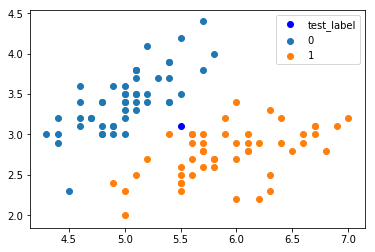

In [13]:
plt.scatter(df[:50]['sepal length (cm)'], df[:50]['sepal width (cm)'], label='0')
plt.scatter(df[50:100]['sepal length (cm)'], df[50:100]['sepal width (cm)'], label='1')
plt.plot(test[0], test[1], 'bo', label='test_label')
plt.legend()

In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
clf.score(X_test, y_test)

1.0